## Importing Libraries


In [69]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [70]:
model = tf.keras.models.load_model('Trained_model.keras')

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Visualizing Single Image of Test Set

In [72]:
import cv2

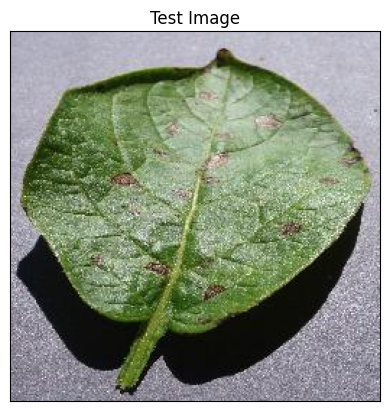

In [73]:
image_path = "test/test/PotatoEarlyBlight5.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB


#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [74]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [75]:
prediction = model.predict(input_arr)
prediction

1/1 [==============================] - 0s 249ms/step


array([[7.2711366e-03, 2.9740306e-09, 1.8025438e-13, 1.0958244e-09,
        2.7841999e-08, 3.4265056e-12, 8.4519468e-14, 4.4294982e-14,
        3.6086261e-09, 1.9577813e-17, 3.3821970e-19, 7.0965669e-18,
        4.0107498e-14, 1.2031578e-17, 2.0644939e-18, 8.5324644e-14,
        2.0328344e-12, 1.3729346e-15, 5.1059079e-08, 9.4385979e-14,
        9.9272788e-01, 3.2361768e-13, 2.6987653e-12, 3.4578668e-17,
        2.7982808e-16, 1.5974991e-16, 2.3971722e-14, 3.2236093e-13,
        3.0143241e-18, 1.2085826e-11, 2.2169269e-08, 1.4014069e-09,
        1.0006579e-06, 8.1943045e-20, 1.4745877e-12, 1.4307785e-21,
        6.0590230e-19, 1.9372457e-11]], dtype=float32)

In [76]:
prediction.shape

(1, 38)

In [77]:
result_index = np.argmax(prediction)
result_index

20

In [78]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

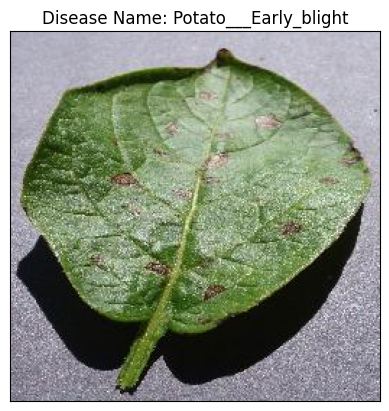

In [79]:
#Displating Result of Disease Prediction 
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Disease Name: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()

In [80]:
model_prediction


'Potato___Early_blight'